# bootstrapping
from https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60

## standard error of sample mean
verify that the standard error of the sample mean follows the equation:

sigma(sample mean) = sigma(original distribution) / sqrt(sample size)


original distribution: mu: 0, sigma: 1.0


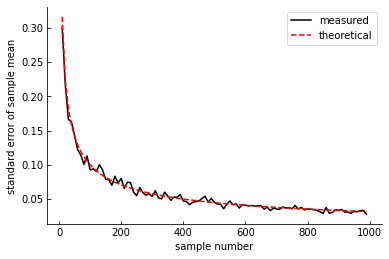

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pyplot_tools import format_figure

# define the normal distribution
mu, sigma = 0, 1.
print(f"original distribution: mu: {mu}, sigma: {sigma}")

# sample number: 10, 20, 30, ..., 1000
sample_number_list = np.arange(10, 1000, 10)
stdev_of_sample_mean_list = []

for sample_number in sample_number_list:
    # do 100 trials of taking sample_number of samples from the distribution
    trials = 100
    mean_list = []
    for i in range(trials):
        sample = np.random.normal(mu, sigma, sample_number)
        mean_list.append(np.mean(sample))
    stdev_of_sample_mean_list.append(np.std(mean_list))


plt.plot(sample_number_list, stdev_of_sample_mean_list, 'k', label="measured")
plt.plot(sample_number_list, sigma / np.sqrt(sample_number_list), 'r--', label="theoretical")
plt.xlabel("sample number")
plt.ylabel("standard error of sample mean")
plt.legend()
format_figure(plt.gca())
plt.show()

i.e. more samples means more accurate estimates of the mean, though with diminishing returns. Kind of neat how well it fits the theoretical line!

## bootstrapping
guess the "quality" (standard error) of a statistic about sampled data

In [14]:
# from https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60
# this is the population, which is supposed to not be measurable (only samples can be taken)
pickups = np.random.randint(0, 500, size=200)
pickups

array([ 14, 333,  40, 116, 371, 383, 327,  66, 175, 277, 416,   2, 434,
       472,  57, 182, 199, 215,  59, 134, 375, 330, 431, 315,  12, 113,
       384, 285,   7, 396, 435, 375, 497,  52,  68, 325, 239,  19, 109,
       297,  46, 295,  95, 138, 410, 384,  94, 425,  21,  46, 401, 408,
       472,  54, 326, 165, 216, 370, 360, 119, 412,  88, 125, 172, 199,
         2, 476, 421, 495, 494, 441, 295, 334,  12,  11, 456, 115, 415,
       300, 450,  91,  76, 144, 273, 224, 460, 142, 455, 236, 220, 248,
       288,  80,  88,  59,  94, 270, 263, 132, 145, 177, 415,  61,  69,
       274, 286, 351,   2,  82,  74, 409,  52,  95, 316, 302, 329, 227,
       234, 456, 230, 150, 365, 226,  23,  30,  59, 381, 380,  55, 162,
       400, 177,  49, 480, 276, 224, 331,  58, 337, 471,  49, 445, 459,
       477, 156, 374, 258, 376,  45,   0, 499, 177, 217, 174, 382, 396,
        89, 460, 190, 249, 494, 498,  31, 257, 227, 116, 135, 470,  76,
         4, 451, 242, 202,  45, 281, 180, 427,  97,  21, 326, 29

In [15]:
# calculate mean and stdev of the population (which are not supposed to be measurable)
population_mean = np.mean(pickups)
population_stdev = np.std(pickups)
print(f"population mean: {population_mean}, population stdev: {population_stdev}")

population mean: 237.71, population stdev: 151.64832969736264


In [16]:
# create a sample (this is what is supposed to be known)
sample_size = 60
sample = np.random.choice(pickups, size=sample_size)
sample

array([450, 119, 326,  59, 351, 497, 113, 165,  74, 326, 374, 300, 175,
        49, 497, 360,  30, 281, 460, 281, 273, 260,  97,  65, 351, 116,
       314, 314,  76, 326, 434, 371,  74, 365, 415, 190, 297, 427, 415,
       445, 135,  11, 234, 116, 337, 374,  30, 156, 150, 202,  49, 431,
        69,  58, 182, 226, 401, 297,   4, 224])

In [17]:
sample_mean = np.mean(sample)
sample_stdev = np.std(sample)
print(f"sample mean: {sample_mean}, sample stdev: {sample_stdev}")

sample mean: 243.3, sample stdev: 143.19686914640744


In [18]:
# estimated standard error of sample mean
sample_stdev / np.sqrt(sample_size)

18.486636314435955

In [19]:
# theoretical standard error of sample mean
population_stdev / np.sqrt(sample_size)

19.577715179935236

In [20]:
sample_bootstrapped = []
for _ in range(100000):
    bootsample = np.random.choice(sample, size=sample_size)
    sample_bootstrapped.append(np.mean(bootsample))

In [21]:
simulated_mean = np.mean(sample_bootstrapped)
simulated_stdev = np.std(sample_bootstrapped)
print(f"simulated mean: {simulated_mean}, simulated stdev: {simulated_stdev}")

simulated mean: 243.31611766666666, simulated stdev: 18.478932576908555


(array([1.2000e+01, 2.3300e+02, 2.4910e+03, 1.1648e+04, 2.7023e+04,
        3.2782e+04, 1.9363e+04, 5.5720e+03, 8.1300e+02, 6.3000e+01]),
 array([159.9       , 175.80666667, 191.71333333, 207.62      ,
        223.52666667, 239.43333333, 255.34      , 271.24666667,
        287.15333333, 303.06      , 318.96666667]),
 <BarContainer object of 10 artists>)

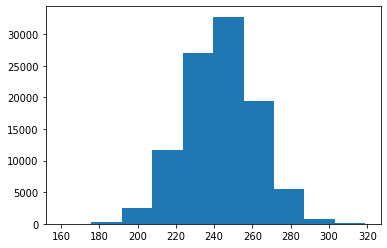

In [22]:
plt.hist(sample_bootstrapped)

In [23]:
print(f"population mean\t{population_mean}\nsample mean\t{sample_mean}\nbootstrap mean\t{simulated_mean}\n")
print(f"population stdev\t{population_stdev / np.sqrt(sample_size)}\nsample stdev\t{sample_stdev / np.sqrt(sample_size)}\nbootstrap stdev\t{simulated_stdev}")

population mean	237.71
sample mean	243.3
bootstrap mean	243.31611766666666

population stdev	19.577715179935236
sample stdev	18.486636314435955
bootstrap stdev	18.478932576908555


boostrapping gets us much much closer to the population values!!


追記: I later realized I had been bootstrapping from the original distribution, which would of course make the estimate for the mean much better. After changing it to bootstrapping from the sampled distribution, it's not really much better than the statistics of the original sample...

## EDF, PDF, CDF
Empirical Distribution Function: discrete distribution that is created from sampled data

Cumulative Distribution Function $F$: CDF of a distribution function of a random variable X is the probability that a random variable X is less than or equal to a given value.

Then, the population mean (or expected value) of $X$ is a statistical functional...
$$
E(X) = \int x dF(x) = \int x p(x) dx
$$

where $p$ is the PDF.

The towardsdatascience article goes on after this to talk about plug-in principle and whatnot, but it's beyond me for now...